# Relatório Intermediário - Abel Cavalcante
---
Este relatório apresenta o resultado de três projetos, todos calculando o alinhamento de duas sequências de DNA distintas:  
- A primeira usa a Heurística de Alinhamento Local de Smith-Waterman;
- A segunda usa um algoritmo Local para Alinhamento;
- E, por fim, é usado uma técnica de Busca Exaustiva para Alinhamento de Sequências.
---

### Preparações
 
Em todos os testes, as mesmas entradas foram utilizadas e todas foram geradas pelo notebook *SequenceGenerator.ipynb*. Este arquivo gera 8 pastas de entradas, e em cada pasta há 5 arquivos com diferentes sequências de DNA. Cada pasta é separada de acordo com o tamanho das sequências: a sequência 1 possui tamanho fixo de 50, já a sequência 2 muda de acordo com a pasta.
 
A primeira pasta *entradas_1* possui a sequência 2 de tamanho 10, e em cada pasta subsequente o tamanho do sequência 2 aumenta, sendo sempre multiplicado por 10: a pasta *entradas_2* possui a sequência com tamanho 100, a *entrada_3* possui tamanho 1000, e assim por diante.

### Heurística de Alinhamento Local de Smith-Waterman

Nesse primeiro método, foi utilizado a Heurística de Alinhamento Local de Smith-Waterman. Para usá-la e testá-la, uma das sequência foi mantida com tamanho 50 e a outra varia entre 10 e 1.000.000:



In [1]:
import subprocess, os
import matplotlib.pyplot as plt

In [2]:
def mean_files(mean, algorithm, files):
    for i in range(files):
        times = []
        for filename in os.listdir(f'Entradas/entradas_{i+1}'):
            with open(f'Entradas/entradas_{i+1}/{filename}', 'r') as file:
                proc = subprocess.run([f'Codigos/{algorithm}'], stdin=file, stdout=subprocess.PIPE)
                out = proc.stdout.decode('utf-8')

                if 'Tempo' in out:
                    times.append(float(out.split('\n')[-2].split(' ')[-2]))

        mean.append(sum(times) / len(times))

Cada tamanho foi testado 5 vezes e foi feita uma média dos tempos obtidos. Assim, foi feito um gráfico juntando o tempo médio para cada tamanho de entrada, em ms:

In [3]:
means_smith = []

mean_files(means_smith, 'her', 6)


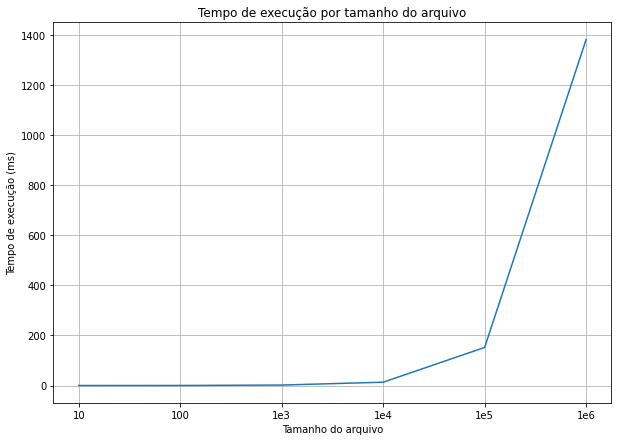

In [4]:
sizes_smith = ['10', '100', '1e3', '1e4', '1e5', '1e6']

plt.figure(figsize = (10, 7))
plt.plot(sizes_smith, means_smith)
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.grid(True)
plt.show()

É importante salientar que, para tamanhos na magnitude de 10.000.000, o programa começa a falhar:

In [5]:
means_teste_smith = []

mean_files(means_teste_smith, 7)

TypeError: mean_files() missing 1 required positional argument: 'files'

Ao explorar mais a fundo, é possível observar que é enviado um 'Killed' para o programa, o que pode-se supor que o poder computacional não é suficiente para comportar o tamanho da entrada ou o código não é otimizado o suficiente paar essas entradas.  
Em questão de otimização, é possível conferir quais partes do programa consomem mais recursos do computador fazendo o profiling:

    g++ -Wall -O3 -g heuristica.cc -o her
    valgrind --tool=callgrind ./her < ../Entradas/entradas_3/dna0.seq
    callgrind_annotate callgrind.out.63728 heuristica.cc > analise_calgrind_heuristica

A análise completa ficou dentro do arquivo *analise_calgrind_heuristica*, mas é possível observar que este é o trecho de código que consome mais recursos do computador:

![Heuristica!](Imagens/Analise_Heuristica.png)

Apesar de já ser feito em uma única linha ao invés de uma matriz, essa seria a parte em que o foco em otimização deveria ser feito.

---
### Um algoritmo Local para Alinhamento

No segundo método, foi utilizado um algoritmo Local para Alinhamento, e os mesmos parâmetros do primeiro método foram utilizados:

In [9]:
means_local = []

mean_files(means_local, 'ali', 8)

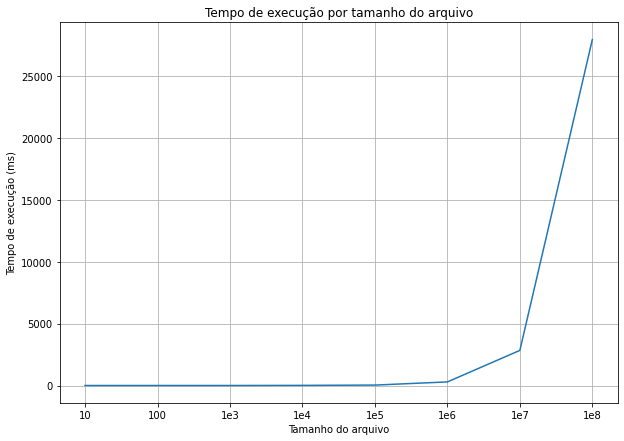

In [12]:
sizes_local = sizes_smith + ['1e7', '1e8']

plt.figure(figsize = (10, 7))
plt.plot(sizes_local, means_local)
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.grid(True)
plt.show()

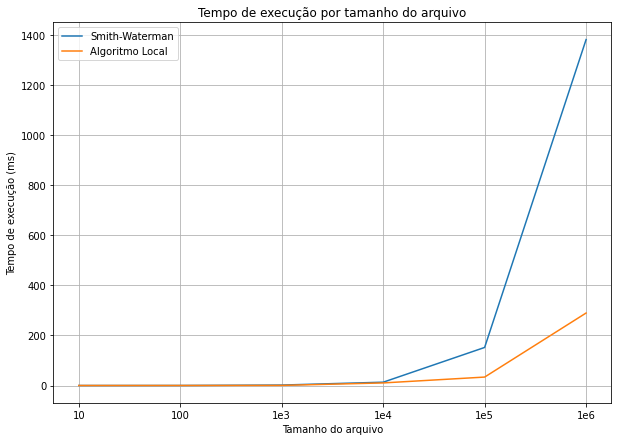

In [16]:
plt.figure(figsize = (10, 7))
plt.plot(sizes_smith, means_smith)
plt.plot(sizes_local[:6], means_local[:6])
plt.legend(['Smith-Waterman', 'Algoritmo Local'])
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.grid(True)
plt.show()


Como é possível observar, o Algorítmo local, apesar de não apresentar uma solução ótima, é mais rápido, ainda mais quando aumentamos a entrada.

Em questão de otimização, é possível fazer o mesmo processo do método 1:

    g++ -Wall -O3 -g alinhamento.cc -o ali
    valgrind --tool=callgrind ./ali < ../Entradas/entradas_3/dna0.seq
    callgrind_annotate callgrind.out.66642 alinhamento.cc > analise_calgrind_local

![Local1!](Imagens/Analise_local_1.png)

![Local2!](Imagens/Analise_local_2.png)

E, novamente, é possível ver que o local que mais consome recursos computacionais é na criação da matriz.

---
### Busca Exaustiva

Por fim, foi feito uma Busca Exaustiva usando os mesmos parâmetros anteriores:

In [20]:
means_exaust = []

mean_files(means_exaust, 'exaust', 7)

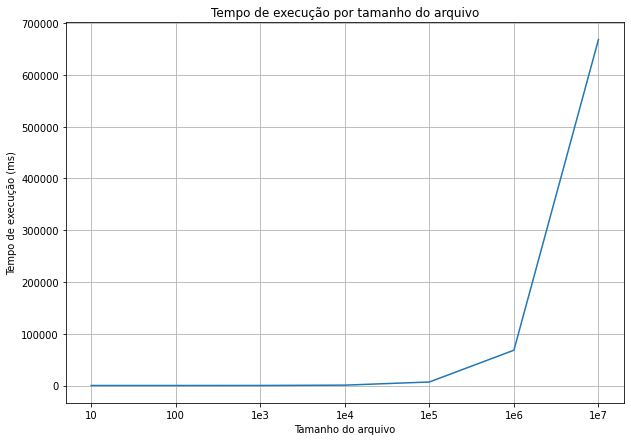

In [22]:
sizes_exaust = sizes_smith + ['1e7']

plt.figure(figsize = (10, 7))
plt.plot(sizes_exaust, means_exaust)
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.grid(True)
plt.show()

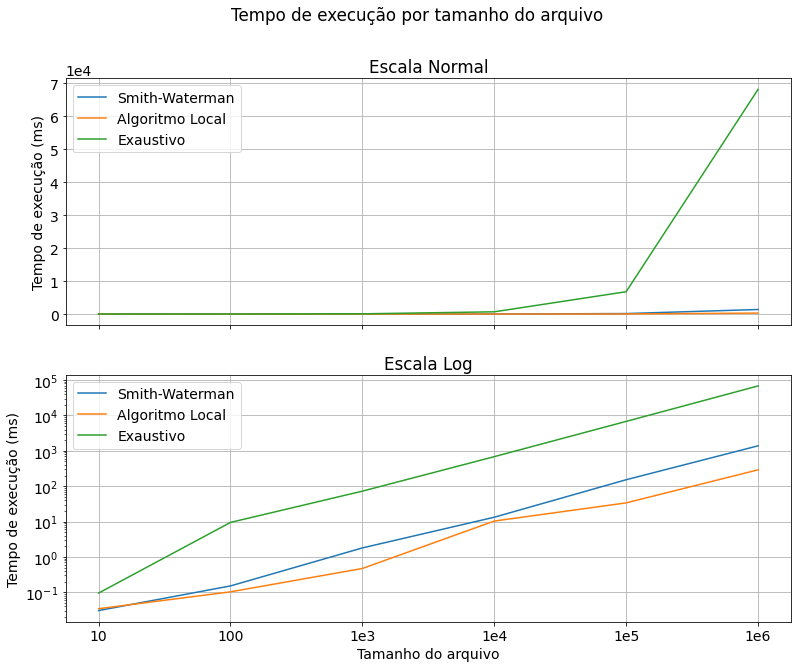

In [59]:
fig, axs = plt.subplots(2, figsize = (13, 10), sharex=True)
fig.suptitle('Tempo de execução por tamanho do arquivo')

plt.rcParams['font.size'] = '14'

axs[0].set_title('Escala Normal')
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

axs[1].set_title('Escala Log')
axs[1].set_yscale('log')

for ax in axs:
    ax.plot(sizes_smith, means_smith)
    ax.plot(sizes_local[:6], means_local[:6])
    ax.plot(sizes_exaust[:6], means_exaust[:6])
    ax.legend(['Smith-Waterman', 'Algoritmo Local', 'Exaustivo'])
    ax.grid(True)

for ax in axs.flat:
    ax.set(xlabel='Tamanho do arquivo', ylabel='Tempo de execução (ms)')

for ax in axs.flat:
    ax.label_outer()

Como é possível observar, a Busca Exaustiva, apesar de devolver o melhor resultado, é o algoritmo mais demorado entre todos testados. Além disso, o aumento na entrada causa um aumento significativo no tempo, fazendo assim com que isso seja o bottleneck do programa já que, com uma entrada de 1e7, ele leva cerca de 1 hora para executar o programa.

É possível fazer a análise do código usando as mesmas ferramentas já utilizadas:

    g++ -Wall -O3 -g exaustiva.cc -o exaust
    valgrind --tool=callgrind ./exaust < ../Entradas/entradas_3/dna0.seq
    callgrind_annotate callgrind.out.99233 exaustiva.cc > analise_calgrind_exaust

![Exaustiva!](Imagens/Analise_Exaustiva.png)

E, diferentemente dos outros algoritmos, a maior parte do processamento está na parte de comparação de subsequências